# Unsupervised Learning using ML
Predict Optimum number of clusters in iris dataset 

##### Name: Samantha Subramanian

# Import Dependencies

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns


In [23]:
data= pd.read_csv(r'D:\OneDrive\Desktop\dataset\Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data Exploration

In [92]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [93]:
data.shape

(150, 5)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [95]:
data.isnull()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


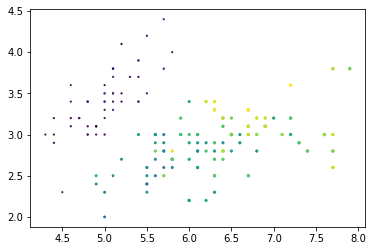

In [91]:
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'],data['PetalLengthCm'],data['PetalWidthCm'])

In [27]:
data=data.drop(['Id'],axis=1)

In [ ]:
#We drop the column Id

In [28]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
data.Species = pd.factorize(data.Species)[0]+1

In [ ]:
#Here, the string values of the column Species are converted to integer to make calculations simpler

In [35]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


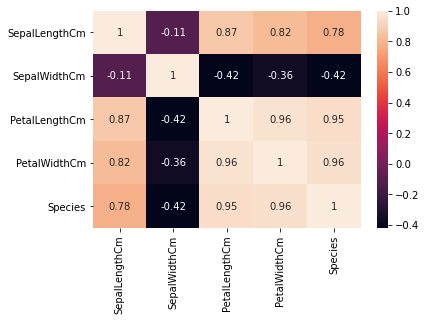

In [97]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
#This heatmap tells us that the columns excluding SepalWidthcm have high correlation with each other.

# Scaling the dataset

In [36]:
mms=MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

# Converting above values to a dataframe

In [38]:
data_transformed = pd.DataFrame(data_transformed, columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])

In [39]:
data_transformed

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1.0
146,0.555556,0.208333,0.677966,0.750000,1.0
147,0.611111,0.416667,0.711864,0.791667,1.0
148,0.527778,0.583333,0.745763,0.916667,1.0


# Replotting the dataset after scaling

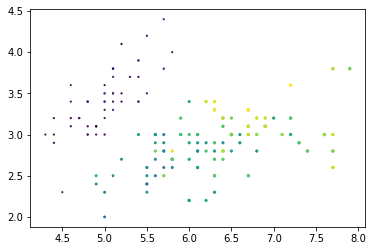

In [44]:
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'],data['PetalLengthCm'],data['PetalWidthCm'])

# Using the elbow method to minimize within cluster sum of squares

In [52]:
sum_of_sq_dist=[]
K= range(1,15)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(data_transformed)
    sum_of_sq_dist.append(km.inertia_)

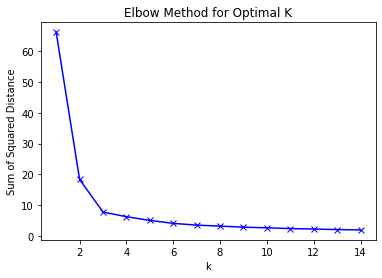

In [54]:
plt.plot(K, sum_of_sq_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distance')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
#In the plot above, the elbow is at k=3. This indicates that k=3 is the optimal number for the iris dataset 

# Clustering the iris dataset with k=3 and finding the total number of observations in each cluster

In [ ]:
kc=KMeans(n_clusters=3)
kc=kc.fit(data)

In [57]:
print(kc.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [61]:
result= kc.labels_
result=pd.DataFrame(result, columns=['Cluster'])
result.groupby('Cluster').size()

Cluster
0    49
1    50
2    51
dtype: int64

In [ ]:
We can conclude that the optimum number of clusters is 3 and the total number of observations in these clusters are 49,50 and 51
respectively.